# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [21]:
# Put your imports here.
import pandas as pd
import folium
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from string import digits

# Unusual import
import imageio

In [22]:
data_folder = './data/'
output_folder = './output/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

__A)  Display a Swiss map that has cantonal borders as well as the national borders__.

Doing this is quite simple, as a TopoJson file is provided, and folium has methods to interpret these. We create a new map and overlay the information from the file on it.

In [23]:
#Load the json file and check it out. We see it contains 'cantons' objects
swiss_cantons_data = json.load(open(data_folder + 'ch-cantons.topojson.json'))

#Create a map with Switzerland's general coordinates, (Lat = ~47, Lon = ~8)
m_ch = folium.Map(location=[46.8, 8.33],
                  tiles='cartodbpositron', zoom_start = 7)

#Add a layer to the map from the given TopoJson file (using the cantons objects we saw earlier)
path = os.path.join(data_folder, 'ch-cantons.topojson.json')

folium.TopoJson(open(path), 'objects.cantons', name='cantons').add_to(m_ch)
folium.LayerControl().add_to(m_ch)

#Save map in output folder
m_ch.save(output_folder + "ch-cantons.html")
m_ch

__B) Take the spreadsheet data/communes_pop.xls, collected from admin.ch, containing population figures for every commune  You can use pd.read_excel() to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?__

When we first load the excel file (we simply use sheet 0, the most recent one), we see that it is quite messy (unnamed columns, lots of Nans, etc...). 

We start by looking for the data we need. Here, this is the commune names and their populations. We find this information in the first and second column, so we extract these to a new dataframe. When doing this, we also drop any Nan values in these columns to get rid of useless rows at the beginning and end.

Now that the data is more dense, we notice that we also have national and cantonal figures, which we do not need. We see that the communes, which we do need, all start with three dots (...), so we drop any rows where the region name does not start with dots.

Finally, we have only the data we want, and we can plot a histogram for it.


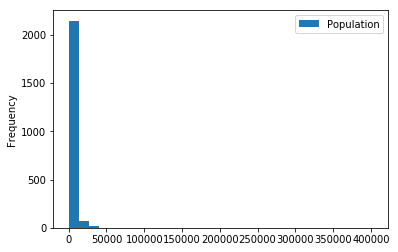

In [40]:
#Read the file (sheet 0 for 2017)
excel_data = pd.read_excel(data_folder + 'communes_pop.xls', sheet_name=0)

#Extract first two columns (area and population) and drop Nan values
communes_pop = excel_data[excel_data.columns[0:2]].dropna()

#Rename columns
communes_pop = communes_pop.rename(columns={communes_pop.columns[0]: 'Commune', communes_pop.columns[1]: 'Population'})

#Keep only communes (which start with ...)
communes_pop.drop(communes_pop[communes_pop.Commune.str.startswith('...') == False].index, inplace=True)

#Sort by population size
communes_pop.sort_values(by='Population',ascending=False, inplace=True)
#plot
communes_pop.plot(kind='hist', x='Commune', y = 'Population', bins=30)


__What does this histogram tell you about urban and rural communes in Switzerland?__

This histogram tells us that there are very many communes with few people (rural) and barely any communes with many people

__Are there any clear outliers on either side, and if so, which communes?__

As can be seen below when filterig for the biggest bucket (with more than 400000 people), the biggest outlier on the side of the urban areas is Zurich. In fact, it has more than twice as many people as the next biggest commune, Geneva.

The clear outliers on the other side are the 2000+ rural communes with less than 10'000 citizens (5 smallest listed below).

In [36]:
biggest_commune = communes_pop[communes_pop.Population > 400000]
biggest_commune

,Commune,Population
186,......0261 Zürich,402762


In [37]:
second_biggest_commune = communes_pop[communes_pop.Population > 150000]
second_biggest_commune

,Commune,Population
186,......0261 Zürich,402762
2326,......6621 Genève,198979
998,......2701 Basel,171017


In [39]:
smallest_communes = communes_pop[communes_pop.Population < 50000].sort_values(by='Population',ascending=True)

smallest_communes.head(5)

,Commune,Population
1706,......5102 Corippo,14
2196,......6172 Bister,30
959,......2549 Kammersrohr,30
219,......0708 Schelten,37
319,......0972 Berken,43


__C) Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?__

For figure (b), we replot the data as above, using with 10, and then 1000 bins and a loglog scale

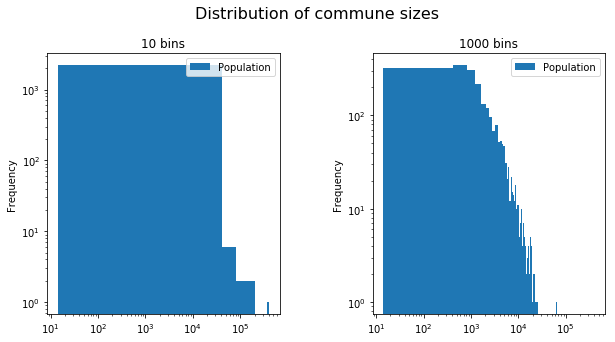

In [41]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Distribution of commune sizes", fontsize=16)
fig.subplots_adjust(top=0.85, wspace=0.4)

communes_pop.plot(kind='hist', loglog=True, bins = 10, title='10 bins', ax=axes[0])
communes_pop.plot(kind='hist', loglog=True, bins = 1000, title='1000 bins', ax=axes[1])

__Description of results__

These two histograms show us in more detail that the vast majority of communities have between 10 and 1000 inhabitants. Then the number gradually sinks.

__Figure (d)...use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y. __

For figure (d), we need to get the cumulative distribution of the data. The y axis will represent the number of communes with a population greater than the value of the x axis.

We can exploit the indices of the dataframe to do this. If we sort the communes from biggest to smallest and then assign them indices starting at 0, the biggest commune will have index 0 (and of course, there are 0 communes bigger than the biggest commune), the second biggest will have index 1 (one commune is bigger than it), etc...

We then set these indices as the y scale.

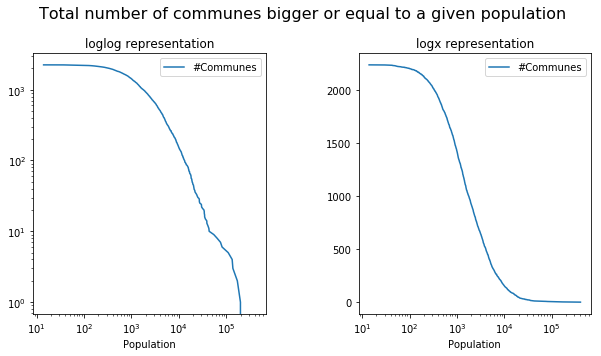

In [42]:
#Cumulative representation: we sort the population by size (biggest first).
#The index then indicates how many communes have more people than this one (how many are higher up on the list)
#We plot according to this index column

#1) Extract the population column
#2) Sort the communes by size from biggest to smallest
#3) Reset the index (dropping the old one) to make it go from 0 to length for biggest to smallest
#4) Reset the index again, without dropping it, to include it in the dataframe values
#5) Rename the old index column
pop_count = communes_pop['Population'].to_frame()\
    .sort_values(by='Population', ascending=False)\
    .reset_index(drop=True).reset_index().rename(columns={'index': '#Communes'})

#plot (2 subplots so the graphs are next to each other)
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Total number of communes bigger or equal to a given population", fontsize=16)
fig.subplots_adjust(top=0.85, wspace=0.4)

pop_count.plot(x = 'Population', y = '#Communes', title='loglog representation', loglog=True, ax=axes[0])
pop_count.plot(x = 'Population', y = '#Communes', title='logx representation', logx=True, ax=axes[1])

__Description of results__

The relatively linear log-log results tell us that the population by communes indeed follows a power law distribution. Many communes have few people, and few communes have many people.

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [9]:
#Data Cleaning
voters_excel = pd.read_excel(data_folder + 'voters.xls', sheet_name=0)

#Get only rows with cantonal values (cantons indicated in first column)
Canton_column_name = 'Elections des parlements cantonaux, de 2014 à 2018: force des partis et attribution des listes mixtes* aux partis'
voter_percentage = voters_excel.rename(columns = {Canton_column_name: 'Cantons'})[2:35]

columns_to_check = voter_percentage.columns[1:]
columns_to_keep = ['Cantons']

def clean_name(name):
    #drop parethesis from party names
    name = name.replace(')', '')
    #drop digits from party names
    name = name.translate(name.maketrans('', '', digits))
    return name
    
for col in columns_to_check:
    potential_party = voter_percentage[col][2]
    if(type(potential_party) is str):
        potential_party = clean_name(potential_party)
        voter_percentage.rename(columns={col: potential_party}, inplace=True)
        columns_to_keep.append(potential_party)

#keep only columns with cantons and the percentages gotten by parties
voter_percentage = voter_percentage[columns_to_keep]
#drop rows with NaN as canton
voter_percentage = voter_percentage[voter_percentage['Cantons'].isnull() == False]
#When NaN s given as voter percentage, we assume this is 0.0%
voter_percentage = voter_percentage.fillna(0.0)

#clean canton names
voter_percentage['Cantons'] = voter_percentage['Cantons'].apply(clean_name)

#reset indexes
voter_percentage = voter_percentage.reset_index(drop=True)

__A) For the period 2014-2018 and for each canton, visualize, on the map, the percentage of voters in that canton who voted for the party UDC__

In [10]:
#Get the percentage of UDC voters
UDC_voters = voter_percentage[['Cantons', 'UDC']] #Years are visibly between 2014 and 2018

#Map canton name to canton abbreviation using cantons file
canton_df = pd.read_csv(data_folder + 'cantons.csv')

#Luckily, even though this file contains the canton names in German and English, and the previous one in French,
#the order of the cantons is the same, so we can join the two tables (short enough for manual check)
canton_df['Cantons'] = UDC_voters['Cantons']
canton_df['UDC'] = UDC_voters['UDC']

percentages = canton_df[['Code', 'UDC', 'Official languages']]

In [11]:
#Preliminary generate a 'language map' of Switzerland
language_map = percentages.copy()

def language_colors(canton_code):
    languages = language_map.loc[language_map['Code'] == canton_code, 'Official languages'].values[0]
    if 'German' in languages and 'Italian' in languages:
        return '#009900'
    elif 'German' in languages and 'French' in languages:
        return '#9900ff'
    elif 'German' in languages:
        return '#0000ff'
    elif 'Italian' in languages:
        return '#ffff00'
    elif 'French' in languages:
        return '#ff0000'
    else:
        return '#ffffff'
    
m_lang = folium.Map(location=[46.8, 8.33],
                    tiles='cartodbpositron', zoom_start = 7)

folium.TopoJson(
    swiss_cantons_data,
    'objects.cantons',
    style_function=lambda feature: {
        'fillColor': language_colors(feature['id']),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_lang)

folium.LayerControl().add_to(m_lang)
m_lang.save(data_folder + 'Canton_languages.html')
m_lang

In [12]:
#Map of UDC voters proportion in each Canton with respective language
m_voters = folium.Map(location=[47, 8.33],
                    tiles='cartodbpositron', zoom_start = 7)

m_voters.choropleth(
    geo_data=swiss_cantons_data,
    topojson='objects.cantons',
    name='choropleth',
    data=percentages,
    columns=['Code', 'UDC'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=2,
    legend_name='Percentages of UDC voters(%)'
)

folium.TopoJson(
    swiss_cantons_data,
    'objects.cantons',
    style_function=lambda feature: {
        'color' : language_colors(feature['id']),
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_voters)

folium.LayerControl().add_to(m_voters)

m_voters.save(data_folder + 'UDC_voter_percentage.html')

m_voters

__Description of results__

UDC is most popular in the German part and least popular in the Italian part.

__B) For the same period, now visualize the number of residents in each canton who voted for UDC__

In [13]:
#Map of number of UDC voters in each Canton with respective language
voter_population = canton_df[['Code', 'Population', 'UDC']].copy()

def change_pop_to_float(population_string):
    population_string = population_string.replace(',', '')
    return float(population_string[:-4])

voter_population['Population'] = voter_population['Population'].copy().apply(change_pop_to_float)
voter_population['UDC Voters'] =  voter_population['Population'] * voter_population['UDC']/100
voter_population_map = voter_population[['Code', 'UDC Voters']]

m_voters_pop = folium.Map(location=[47, 8.33],
                    tiles='cartodbpositron', zoom_start = 7)

m_voters_pop.choropleth(
    geo_data=swiss_cantons_data,
    topojson='objects.cantons',
    name='choropleth',
    data=voter_population_map,
    columns=['Code', 'UDC Voters'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=2,
    legend_name='Number of UDC voters(%)'
)

folium.TopoJson(
    swiss_cantons_data,
    'objects.cantons',
    style_function=lambda feature: {
        'color' : language_colors(feature['id']),
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_voters_pop)

folium.LayerControl().add_to(m_voters_pop)

m_voters_pop.save(data_folder + 'UDC_voter_number.html')

m_voters_pop

__C) Which one of the two visualizations above would be more informative in case of a national election with 
majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? 
Which one is more informative for the cantonal parliament elections?__

In the case of a national election with majority voting, the second map is more useful, as it shows that canton Zurich has the most UDC voters, not just because it has a high percentage of supporters, but because it has a lot of people.

For the cantonal parliament elections, the first map is more interesting, because it tells us about the percentages in each individual canton, not just in relation to the population size of other cantons.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

__A) Take the two parties UDC (Union démocratique du centre) and PS (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period__

In [14]:
#Visualization of the rostigraben between 2014-2018
def leanColor(canton_code):
    canton_lean = rostigraben.loc[rostigraben['Code'] == canton_code, 'Right Lean'].values[0]
    if canton_lean < 0:
        return '#B22222'
    elif canton_lean > 0:
        return '#228B22'
    else:
        return '#808080'

voter_ps_udc = voter_percentage[['Cantons','PS','UDC']]

temp = (voter_ps_udc.loc[:,'UDC'] - voter_ps_udc.loc[:,'PS']) / (voter_ps_udc.loc[:,'UDC'] + voter_ps_udc.loc[:,'PS'])
ps_udc_prop = temp.fillna(0).to_frame(name='Right Lean')
code = canton_df[['Code']]

rostigraben = pd.concat([code,voter_ps_udc,ps_udc_prop], axis=1)

m_rosti = folium.Map(location=[47, 8.33],
                    tiles='cartodbpositron', zoom_start = 7)

folium.TopoJson(
    swiss_cantons_data,
    'objects.cantons',
    style_function=lambda feature: {
        'fillColor': leanColor(feature['id']),
        'color' : 'white',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_rosti)

folium.LayerControl().add_to(m_rosti)

m_rosti.save(data_folder + 'roestigraben.html')

m_rosti

__B) For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton__

In [15]:
#Clean dataset from 2010-2013
voters_excel_2010 = pd.read_excel(data_folder + 'voters.xls', sheet_name='2010-2013')

Canton_column_name = 'Elections des parlements cantonaux, de 2010 à 2013: force des partis et attribution des listes mixtes* aux partis'
#Get only rows with cantonal values (cantons indicated in first column)
voter_percentage_2010 = voters_excel_2010.rename(columns = {Canton_column_name: 'Cantons'})[2:35]

columns_to_check = voter_percentage_2010.columns[1:]
columns_to_keep = ['Cantons']

def clean_name(name):
    #drop parethesis from party names
    name = name.replace(')', '')
    #drop digits from party names
    name = name.translate(name.maketrans('', '', digits))
    return name
    

for col in columns_to_check:
    potential_party = voter_percentage_2010[col][2]
    if(type(potential_party) is str):
        potential_party = clean_name(potential_party)
        voter_percentage_2010.rename(columns={col: potential_party}, inplace=True)
        columns_to_keep.append(potential_party)

#keep only columns with cantons and the percentages gotten by parties
voter_percentage_2010 = voter_percentage_2010[columns_to_keep]
#drop rows with NaN as canton
voter_percentage_2010 = voter_percentage_2010[voter_percentage_2010['Cantons'].isnull() == False]
#When NaN s given as voter percentage, we assume this is 0.0%
voter_percentage_2010 = voter_percentage_2010.fillna(0.0)

#clean canton names
voter_percentage_2010['Cantons'] = voter_percentage_2010['Cantons'].apply(clean_name)

#reset indexes
voter_percentage_2010 = voter_percentage_2010.reset_index(drop=True)

In [16]:
#Function to visualize left or right political lean of a Canton
def leanGradient(canton_code, data):
    canton_lean = data.loc[data['Code'] == canton_code, 'Right Lean'].values[0]
    if canton_lean > 0:
        G = 255
        R = G-G*abs(canton_lean)
        B = G-G*abs(canton_lean)
        return '#%02x%02x%02x' % (int(R), int(G), int(B))
        
    elif canton_lean < 0:
        R = 255
        G = R-R*abs(canton_lean)
        B = R-R*abs(canton_lean)
        return '#%02x%02x%02x' % (int(R), int(G), int(B))
    if canton_lean == 0:
        return '#808080'

In [17]:
#Map and data generation for 2010-2013
voter_ps_udc_2010 = voter_percentage_2010[['Cantons','PS','UDC']]

temp = (voter_ps_udc_2010.loc[:,'UDC'] - voter_ps_udc_2010.loc[:,'PS']) / (voter_ps_udc_2010.loc[:,'UDC'] + voter_ps_udc_2010.loc[:,'PS'])
ps_udc_prop_2010 = temp.fillna(0).to_frame(name='Right Lean')
code = canton_df[['Code']]

rostigraben_2010 = pd.concat([code,voter_ps_udc_2010,ps_udc_prop_2010], axis=1)

m_rosti_2010 = folium.Map(location=[47, 8.33],
                    tiles='cartodbpositron', zoom_start = 7)

folium.TopoJson(
    swiss_cantons_data,
    'objects.cantons',
    style_function=lambda feature: {
        'fillColor': leanGradient(feature['id'], rostigraben_2010),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_rosti_2010)

folium.LayerControl().add_to(m_rosti_2010)

m_rosti_2010.save(data_folder + 'roestigraben_2010.html')

In [18]:
#Map and data generation for 2014-2018
m_rosti_2014 = folium.Map(location=[47, 8.33],
                    tiles='cartodbpositron', zoom_start = 7)

folium.TopoJson(
    swiss_cantons_data,
    'objects.cantons',
    style_function=lambda feature: {
        'fillColor': leanGradient(feature['id'], rostigraben),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(m_rosti_2014)

folium.LayerControl().add_to(m_rosti_2014)

m_rosti_2014.save(data_folder + 'roestigraben_2014.html')

In [19]:
#Illustration of political lean evolution from 2010 to 2018
#gif
images = []
for file_name in os.listdir(data_folder):
    if file_name.endswith('.png'):
        file_path = os.path.join(data_folder, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(data_folder + 'rostigraben.gif', images, duration=1)

gif_rosti = Image(filename= data_folder + 'rostigraben.gif')

#barplot
temp_2010 = rostigraben_2010.loc[:,'Right Lean'].to_frame('2010-2013')
temp_2014 = rostigraben.loc[:,'Right Lean'].to_frame('2014-2018')

rosti_hist = pd.concat([code, temp_2010, temp_2014], axis=1).rename(columns={'Code' : 'Canton Code'}).set_index('Canton Code')

#subplotting
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("XXX_bully", fontsize=16)
fig.subplots_adjust(top=0.85, wspace=0.4)

#axes[0] = plt.imshow(gif_rosti)
rosti_hist.plot.bar(title='Political lean of each canton (Right being positive, Left negative)', ylim=[-0.9,0.9], ax=axes[1])

RuntimeError: Zero images were written.